# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [2]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [3]:
%pip install --upgrade plotly

### Import Statements

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [38]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
df_data.columns

# checking for NaN values
df_data.isna().any()

len(df_data)

df_data.sample()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4031,4031,4031,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Jul 10, 1964",Vostok | Elektron 3 & 4,StatusRetired,NaN,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [234]:
#checking for duplicate data
df_data.duplicated().values.any()

#Consider removing columns containing junk data.
df = df_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
new_df = df_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [ ]:
df.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [ ]:
df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
lunch_count = df['Organisation'].value_counts()
lunch_count.head()

,count
Organisation,
RVSN USSR,1777
Arianespace,279
CASC,251
General Dynamics,251
NASA,203


In [ ]:
fig = px.pie(labels= lunch_count.index,
             values= lunch_count,
             title= 'Number of Launches by Organisation',
             hole = 0.4,
             names = lunch_count.index
             )
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()



# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
# checking the status of the rocket
rocket_status = df['Rocket_Status'].value_counts()
rocket_status

,count
Rocket_Status,
StatusRetired,3534
StatusActive,790


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
# checking the mission status failed or success.
mission_status = df['Mission_Status'].value_counts()
mission_status

#creating a pie chart
fig = px.pie(labels= mission_status.index,
             values= mission_status,
             title= 'Mission Status',
             hole = 0.4,
             names = mission_status.index
             )
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

In [ ]:
df.sample()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1884,Boeing,"SLC-17A, Cape Canaveral AFS, Florida, USA","Sat Jun 10, 1989 22:30 UTC",Delta II 6925 | NAVSTAR II-2,StatusRetired,NaN,Success


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

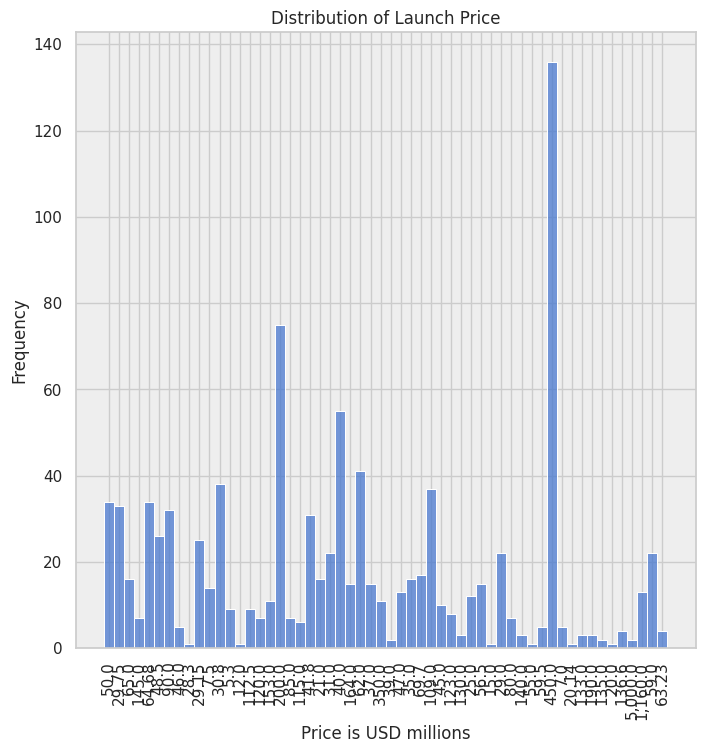

In [ ]:
# extracitng data without the NaN value for lauch price
lunch_price = df.dropna()

# creating a histplot
plt.figure(figsize=(8,8))
sns.histplot(
    data= lunch_price,
    x = lunch_price.Price,
     binwidth=20
)
plt.xticks(rotation=90)
plt.gca().set_facecolor('#eeeeee')
plt.xlabel('Price is USD millions')
plt.ylabel('Frequency')
plt.title('Distribution of Launch Price')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [73]:
# Splitting the 'Location' column into parts by commas
Country = df['Location'].astype(str).str.split(',', expand=True)

# Selecting the 4th part if it exists, otherwise the 3rd part
country = Country[3].fillna(Country[2])
country.fillna(Country[1], inplace=True)

# Stripping any leading or trailing whitespace
country = country.str.strip()

# Adding a new column named 'country' to the DataFrame
df['country'] = country

# Renaming specific country names in the 'country' column
df['country'] = df['country'].replace({
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA',
    'Kazakhstan': 'Russian Federation',
    'Pacific Ocean': 'USA'
})


# Create a new column 'ISO' by applying a function that fetches the ISO code for each country
# Assuming df['country'] contains the country names
iso_code = [countries.get(i).alpha3 if i in countries else None for i in df['country']]

# Assign the ISO codes to a new column in the DataFrame
df['ISO'] = iso_code

# Replacing the ISO codes for specific countries
df.loc[df['country'] == 'Iran', 'ISO'] = 'IRN'
df.loc[df['country'] == 'North Korea', 'ISO'] = 'PRK'
df.loc[df['country'] == 'South Korea', 'ISO'] = 'KOR'



df.ISO.isna().sum()

0

In [9]:
missions_df = df.groupby('ISO').agg(Missions=('Mission_Status', 'count')).reset_index()
missions_df.sort_values('Missions', ascending=False)

# creating a chloropeth
fig = px.choropleth(missions_df,
                    locations=missions_df.ISO,
                    color=missions_df.Missions,
                    hover_name=missions_df.ISO,
                    title='Number of Launches by Country',
                    color_continuous_scale=px.colors.sequential.matter)
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    title_x=0.5

)
fig.show()



# Use a Choropleth Map to Show the Number of Failures by Country


In [10]:
mission_status_df = df[df['Mission_Status'] == 'Failure']
mission_status_df = mission_status_df.groupby('ISO').agg(Failed_Missions=('Mission_Status', 'count')).reset_index()
mission_status_df.sort_values('Failed_Missions', ascending=False)

# creating a chorepleth
fig = px.choropleth(mission_status_df,
                    locations=mission_status_df.ISO,
                    color=mission_status_df.Failed_Missions,
                    hover_name=mission_status_df.ISO,
                    title='Number of Failures by Country',
                    color_continuous_scale=px.colors.sequential.matter)
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    title_x=0.5

)
fig.show()


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [14]:
sunbrust_df = df.groupby(['country', 'Organisation', 'Mission_Status']).agg(Missions=('Mission_Status', 'count')).reset_index()
sunbrust_df.sort_values('Missions', ascending=False)

,country,Organisation,Mission_Status,Missions
68,Russian Federation,RVSN USSR,Success,1614
19,France,Arianespace,Success,267
9,China,CASC,Success,231
94,USA,General Dynamics,Success,203
77,Russian Federation,VKS RF,Success,188
...,...,...,...,...
74,Russian Federation,Starsem,Success,1
80,South Korea,KARI,Success,1
82,USA,AMBA,Partial Failure,1
88,USA,Douglas,Success,1


In [13]:
# creating a sunbrust chart
fig = px.sunburst(sunbrust_df,
                  title='Organisation and Mission Status by Country',
                  path=['country', 'Organisation', 'Mission_Status'],
                  values= 'Missions',
                  color= 'country',
                  color_continuous_scale=px.colors.sequential.matter)
fig.update_layout(
    title_x=0.5,
    margin=dict(t=20, l=5, r=5, b=5)

)
fig.show()


# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [74]:
# changing the datatype of the price
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Creating a total amount of money spent by org df
money_spent_df = df.groupby('Organisation').agg(Total_Money_Spent=('Price', 'sum')).reset_index()
money_spent_df.sort_values('Total_Money_Spent', ascending=False)

# creating a bar chart
fig = px.bar(money_spent_df,

             y= 'Organisation',
             x= 'Total_Money_Spent',
             title= 'Total Amount of Money Spent by Organisation on Space Missions',
             color= 'Organisation',
             color_continuous_scale=px.colors.sequential.matter,
             orientation= 'h'
             )
fig.update_layout(
    title_x=0.5,
    margin=dict(t=20, l=5, r=5, b=5)

)
fig.show()

In [18]:
df.sample()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,ISO
1464,ILS,"SLC-36B, Cape Canaveral AFS, Florida, USA","Thu Feb 01, 1996 01:15 UTC",Atlas IIAS | Palapa C1,StatusRetired,0.00,Success,USA,USA


# Analyse the Amount of Money Spent by Organisation per Launch

In [75]:
# Fixing Price Column Replacing NaN values by zero
df.Price.fillna(0, inplace=True)

# Creating a total amount of money spent by org
money_spent_df = df.groupby(['Organisation', 'Detail', 'Price']).agg(Total_Money_Spent=('Price', 'sum')).reset_index()
money_spent_df.sort_values('Total_Money_Spent', ascending=False)

# creating a barchart
fig = px.bar(money_spent_df,
             y= 'Organisation',
             x= 'Total_Money_Spent',
             title= 'Amount of Money Spent by Organisation per Launch',
             color= 'Organisation',
             color_continuous_scale='Viridis',
             orientation= 'h',
             hover_name= 'Organisation',
             hover_data= ['Detail', 'Price']
             )
fig.update_layout(
    title_x=0.5,
    margin=dict(t=20, l=5, r=5, b=5)

)
fig.show()


<ipython-input-75-d3695fc3577e>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [233]:
df.sample()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,ISO,Year,Month
384,JAXA,"Mu Pad, Uchinoura Space Center, Japan",2016-12-20,Epsilon | ERG,StatusActive,0.00,Success,Japan,JPN,2016,12


# Chart the Number of Launches per Year

In [96]:
# df['Date'] = pd.to_datetime(new_df['Date'], format='mixed')
df['Date'] = df['Date'].astype('str').str.split(' ', expand=True)[0] # converting into the date time objects

df['Year'] = pd.to_datetime(df['Date']).dt.year # extracting the year

# grouping the number of lunches per
yearly_launches = df.groupby('Year').agg(Total_Launches=('Year', 'count')).reset_index()
yearly_launches

# rolled database
yearly_launches = yearly_launches.rolling(window=3, min_periods=1).mean()
# creating a line chart
fig = px.line(
    yearly_launches,
    x= 'Year',
    y= 'Total_Launches',
    title= 'Number of Launches per Year',
)
fig.update_layout(
    title_x=0.5,
    margin=dict(t=20, l=5, r=5, b=5),
    legend_title_text='Launches'
)
fig.show()


In [71]:
df.sample()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Date_Only
1216,VKS RF,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",NaT,Tsyklon-2 | Cosmos 2367,StatusRetired,NaN,Success,NaN


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [102]:
df['Month'] = pd.to_datetime(df['Date']).dt.month

# monthly launches database
monthly_launches = df.groupby('Month').agg(Total_Launches=('Month', 'count')).reset_index()
monthly_launches

# Replacing the month by letters Eg. Jan, feb et
monthly_launches['Month'] = monthly_launches['Month'].apply(lambda x: datetime.strptime(str(x), '%m').strftime('%b'))

# creating a chart for the visualation
fig= px.bar(monthly_launches,
            x= 'Month',
            y= 'Total_Launches',
            title= 'Number of Launches Month-on-Month',
            color= 'Month',
            color_continuous_scale=px.colors.sequential.matter,
            hover_name= 'Month',
            hover_data= ['Total_Launches']
            )
fig.update_layout(
    title_x=0.5,
    margin=dict(t=20, l=5, r=5, b=5)

)
fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [104]:
# extracting most and least popular months
most_popular_month = monthly_launches.loc[monthly_launches['Total_Launches'].idxmax()]
least_popular_month = monthly_launches.loc[monthly_launches['Total_Launches'].idxmin()]

print(f'The most popular month for launches is {most_popular_month["Month"]} with {most_popular_month["Total_Launches"]} launches.')
print(f'The least popular month for launches is {least_popular_month["Month"]} with {least_popular_month["Total_Launches"]} launches.')

The most popular month for launches is Dec with 450 launches.
The least popular month for launches is Jan with 268 launches.


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [113]:
df.head()


yearly_prices = df.groupby('Year').agg(Average_Price=('Price', 'mean')).reset_index()
yearly_prices

# removing all the years with Price = 0
yearly_prices = yearly_prices[yearly_prices['Average_Price'] != 0]

# creating a line chart
fig = px.line(
    yearly_prices,
    x= 'Year',
    y= 'Average_Price',
    title= 'Average Price of Rocket Launches Over Time',
    hover_name= 'Year',
    hover_data= ['Average_Price']
)
fig.update_layout(
    title_x=0.5,
    margin=dict(t=40, l=5, r=5, b=5),
    legend_title_text='Launches'
)
fig.show()


In [122]:
df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,ISO,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA,USA,2020,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Russian Federation,RUS,2020,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020,7


# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [133]:
# Grouping by Year and Organisation, counting the number of missions
org_df = df.groupby(['Year', 'Organisation'], as_index=False).agg({'Mission_Status': 'count'})


# Renaming the column for clarity
org_df.rename(columns={'Mission_Status': 'Launch_Count'}, inplace=True)

cum_org = org_df.groupby(['Organisation', 'Year']).sum().groupby(level=0).cumsum().reset_index()

# Calculating cumulative launches per organisation over the years
org_df['Cumulative_Launches'] = (
    org_df.groupby('Organisation')['Launch_Count']
    .cumsum()
)

# Displaying the result
org_df.head()

# creating a linechart
fig = px.line(
    cum_org,
    x= 'Year',
    y= 'Launch_Count',
    color= 'Organisation',
    color_discrete_sequence=px.colors.qualitative.G10,
    title= 'Number of Launches over Time by the Top 10 Organisations',
    hover_name= 'Organisation',
    hover_data= ['Launch_Count']
)
fig.update_layout(
    title_x=0.5,
    margin=dict(t=50, l=5, r=5, b=5)

)
fig.show()


In [136]:
df.loc[df['Organisation'] == 'RVSN USSR'].value_counts()

Organisation  Location                                     Date        Detail                            Rocket_Status  Price  Mission_Status  country             ISO  Year  Month
RVSN USSR     Mayak-2, Kapustin Yar, Russia                1961-10-27  Cosmos-2I (63S1) | DS-1 1         StatusRetired  0.00   Failure         Russian Federation  RUS  1961  10       1
              Site 41/1, Plesetsk Cosmodrome, Russia       1975-06-27  Voskhod | Cosmos 747              StatusRetired  0.00   Success         Russian Federation  RUS  1975  6        1
                                                           1975-12-25  Vostok-2M | Meteor n†­33          StatusRetired  0.00   Success         Russian Federation  RUS  1975  12       1
                                                           1975-10-17  Voskhod | Cosmos 776              StatusRetired  0.00   Success         Russian Federation  RUS  1975  10       1
                                                           1975-09-23  Voskhod | Cosmos 769              StatusRetired  0.00   Success         Russian Federation  RUS  1975  9        1
                                                                                                                                                                                      ..
              Site 133/3, Plesetsk Cosmodrome, Russia      1969-11-04  Cosmos-2I (63SM) | Cosmos 308     StatusRetired  0.00   Success         Russian Federation  RUS  1969  11       1
                                                           1969-10-18  Cosmos-2I (63SM) | Cosmos 303     StatusRetired  0.00   Success         Russian Federation  RUS  1969  10       1
                                                           1969-08-22  Cosmos-2I (63SM) | Cosmos 295     StatusRetired  0.00   Success         Russian Federation  RUS  1969  8        1
                                                           1969-07-23  Cosmos-2I (63SM) | DS-P1-You #23  StatusRetired  0.00   Failure         Russian Federation  RUS  1969  7        1
              Site 90/20, Baikonur Cosmodrome, Kazakhstan  1991-01-18  Tsyklon-2 | Cosmos 2122           StatusRetired  0.00   Success         Russian Federation  RUS  1991  1        1
Name: count, Length: 1777, dtype: int64

,Year,ISO,Launch_Count,Cumulative_Launches
0,1957,USA,1,1
1,1958,USA,16,17
2,1959,USA,15,32
3,1960,USA,25,57
4,1961,USA,35,92


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

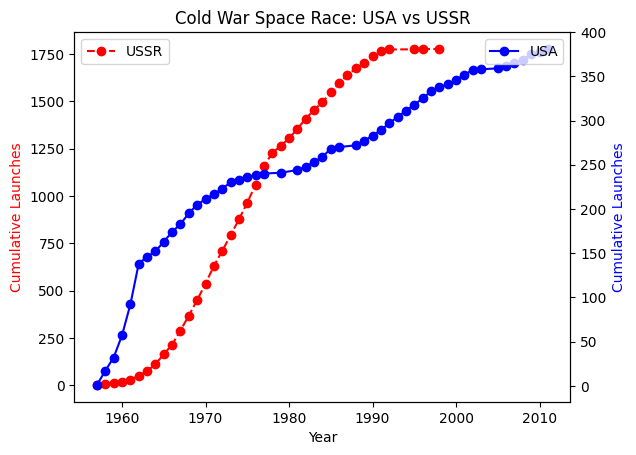

In [170]:
Russia_df= org_df.loc[org_df['Organisation'] == 'RVSN USSR']


Us = df.loc[(df['Organisation'] == 'NASA') |
                (df['Organisation'] == 'US Navy') |
                (df['Organisation'] == 'US Air Force')
             ]


# grouping the database
Us_df = Us.groupby(['Year', 'ISO'], as_index=False).agg({'Mission_Status': 'count'})




# Renaming the column for clarity
Us_df.rename(columns={'Mission_Status': 'Launch_Count', 'ISO': 'Organisation'}, inplace=True)

Us_df['Cumulative_Launches'] = (
    Us_df.groupby('Organisation')['Launch_Count']
    .cumsum()
)

Us_df.head()


# creating a line chart using plt
ax1 = plt.gca()
ax2 = ax1.twinx()

# plotting the charts
ax1.plot(
    Russia_df['Year'],
    Russia_df['Cumulative_Launches'],
    color= 'red',
    label= 'USSR',
    marker= 'o',
    linestyle= '--'
)
ax2.plot(
    Us_df['Year'],
    Us_df['Cumulative_Launches'],
    color= 'blue',
    label= 'USA',
    marker= 'o',
)
ax1.set_xlabel('Year')
ax1.set_ylabel('Cumulative Launches', color= 'red')
ax2.set_ylabel('Cumulative Launches', color= 'blue')
ax1.set_title('Cold War Space Race: USA vs USSR')
ax1.legend(loc= 'upper left')
ax2.legend(loc= 'upper right')
plt.show()



In [179]:
# merging Us_df and Russsia_df
merged_df = pd.merge(Us_df, Russia_df, on='Year', suffixes=('_USA', '_USSR'))

country_launches = pd.DataFrame({
    'Country': ['USA', 'USSR'],
    'Cumulative_Launches': [merged_df['Cumulative_Launches_USA'].iloc[-1], merged_df['Cumulative_Launches_USSR'].iloc[-1]]
})
country_launches


,Country,Cumulative_Launches
0,USA,338
1,USSR,1777


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [182]:
fig = px.pie(
    country_launches,
    values= 'Cumulative_Launches',
    names= 'Country',
    title= 'Total Number of Launches of the USSR and the USA'

)
fig.update_traces(
    textposition= 'inside',
    textinfo= 'percent+label'

)
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [189]:
#grouping the database for yearly launch
yearly_launches = df.groupby(['Year', 'ISO', 'Mission_Status']).agg(Yearly_Lauch=('Year', 'count')).reset_index()
# creating a cumulative lauches for the country
yearly_launches['Cumulative_Launches'] = (
    yearly_launches.groupby('ISO')['Yearly_Lauch']
    .cumsum()
)
yearly_launches.head()

# two superpowers df
two_superpowers = yearly_launches.loc[(yearly_launches['ISO'] == 'USA') | (yearly_launches['ISO'] == 'RUS')]
two_superpowers.head()

# Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers
fig = px.line(
    two_superpowers,
    x= 'Year',
    y= 'Cumulative_Launches',
    color= 'ISO',
    color_discrete_sequence=px.colors.qualitative.G10,
    title= 'Total Number of Launches Year-On-Year by the Two Superpowers',
    hover_name= 'ISO',
    hover_data= ['Yearly_Lauch']
)
fig.update_traces(
    mode= 'lines+markers'
)

fig.show()

In [212]:
yearly_launches.drop(columns='Failure_Percentage')

,Year,ISO,Mission_Status,Yearly_Lauch,Cumulative_Launches
0,1957,RUS,Success,2,2
1,1957,USA,Failure,1,1
2,1958,RUS,Failure,4,6
3,1958,RUS,Success,1,7
4,1958,USA,Failure,16,17
...,...,...,...,...,...
533,2020,NZL,Failure,1,11
534,2020,NZL,Success,2,13
535,2020,RUS,Success,9,2099
536,2020,USA,Failure,1,1367


## Chart the Total Number of Mission Failures Year on Year.

In [213]:
# total no mission per year
mission_per_year = df.groupby('Year').agg(Total_Missions=('Year', 'count')).reset_index()
# failure per year
failure_per_year = df.loc[df['Mission_Status'] == 'Failure']
failure_per_year = failure_per_year.groupby('Year').agg(Total_Failures=('Year', 'count')).reset_index()



# creating Chart the Total Number of Mission Failures Year on Year.
fig = px.line(
    failure_per_year,
    x= 'Year',
    y= 'Total_Failures',
    title= 'Total Number of Mission Failures Year on Year',
    hover_name= 'Year',
    hover_data= ['Total_Failures']
)
fig.update_layout(
    title_x=0.5,
    margin=dict(t=50, l=5, r=5, b=5)

)
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [215]:
failure_per_year['Failure_Pct'] = (failure_per_year['Total_Failures'] / mission_per_year['Total_Missions']) * 100
failure_per_year.tail()

# Chart the Percentage of Failures over Time
fig = px.line(
    failure_per_year,
    x= 'Year',
    y= 'Failure_Pct',
    title= 'Percentage of Failures over Time',
    hover_name= 'Year',
    hover_data= ['Failure_Pct']
)

fig.update_layout(
    title_x=0.5,
    margin=dict(t=50, l=5, r=5, b=5)

)
fig.show()

In [216]:
failure_per_year.head()

,Year,Total_Failures,Failure_Pct
0,1957,1,33.33
1,1958,20,71.43
2,1959,9,45.00
3,1960,20,51.28
4,1961,17,32.69


# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [227]:
yearly_launches.head()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)
nation_yearly_launches = yearly_launches.groupby(['Year','ISO']).agg(Total_Launches=('Yearly_Lauch', 'max')).reset_index()
nation_yearly_launches.head()

# creating df that has Country which was in the Lead in terms of Total Number of Launches
year_lead = nation_yearly_launches.loc[nation_yearly_launches.groupby('Year')['Total_Launches'].idxmax()]
year_lead.head()

# visualising the data using the chart
plt.figure(figsize=(8,4), dpi=200)

fig = px.scatter(
    year_lead,
    x = 'Year',
    y = 'Total_Launches',
    color = 'ISO',
    hover_name = 'ISO',
    size = 'Total_Launches',
    title = 'For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)'
)
fig.update_layout(
    title_x=0.5,
    margin=dict(t=50, l=5, r=5, b=5)

)
fig.show()




<Figure size 1600x800 with 0 Axes>

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [230]:
yearly_launches = df.groupby(['Year', 'Organisation']).agg(Yearly_Lauch=('Year', 'count')).reset_index()
yearly_launches.head()

,Year,Organisation,Yearly_Lauch
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,AMBA,7
3,1958,NASA,2
4,1958,RVSN USSR,5


In [232]:
# visualising the data using the scatter plot
plt.figure(figsize=(8,4), dpi=200)

fig = px.scatter(
    yearly_launches,
    x= 'Year',
    y= 'Yearly_Lauch',
    color= 'Organisation',
    color_discrete_sequence=px.colors.qualitative.G10,
    title= 'Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches',
    hover_name= 'Organisation',
    hover_data= ['Yearly_Lauch']
)

fig.update_layout(
    title_x=0.5,
    margin=dict(t=50, l=5, r=5, b=5)

)
fig.show()

<Figure size 1600x800 with 0 Axes>